Задание
Для изображения "starry_night.jpg":

 - Считать изображение
 - Перевести в серошкальный формат
 - Провести эквализацию гистограммы
 - Выделить границы на изображении
 - Добавить на изображение элипсы произвольного цвета (использовать random)
 - Добавить на изображение лого OpenCV
 - Сохранить результат в формате PNG

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [9]:
pil_img = Image.open('starry_night.jpg')
img = np.array(pil_img)
plt.imshow(img)
plt.show()
print(img.shape)

(833, 1000, 3)


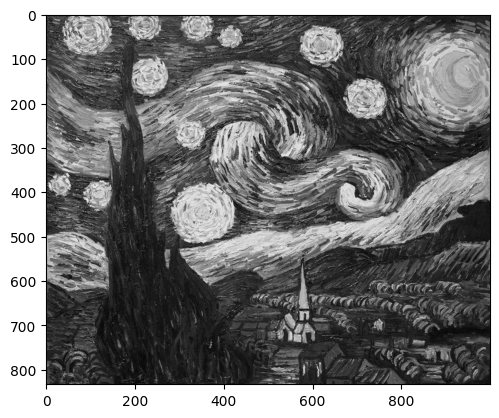

(833, 1000)


In [8]:
img_gr = np.array(Image.open('starry_night.jpg').convert('L'))
plt.imshow(img_gr, cmap='gray')
plt.show()
print(img_gr.shape)

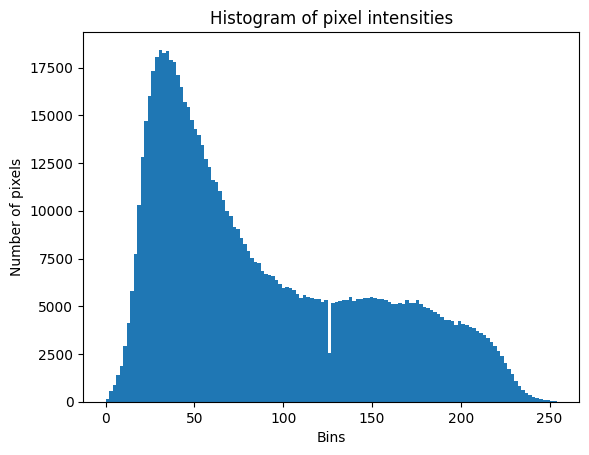

In [10]:
plt.figure()
plt.hist(img_gr.flatten(), 128)
plt.xlabel("Bins")
plt.ylabel("Number of pixels")
plt.title('Histogram of pixel intensities')
plt.show()

In [14]:
def histeq(im, nbr_bins=256):
    """ Histogram equalization of a grayscale image. """
    # get image histogram
    imhist, bins = np.histogram(im.flatten(), nbr_bins)
    cdf = imhist.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize
    # use linear interpolation of cdf to find new pixel values
    im2 = np.interp(im.flatten(), bins[:-1], cdf)
    return im2.reshape(im.shape), cdf

In [30]:
img_eq, cdf = histeq(img_gr)
fig, ax = plt.subplots(2, 3, figsize=(15, 8))
ax[0, 0].imshow(img_gr, cmap='gray')
ax[0, 1].imshow(img_eq, cmap='gray')
ax[0, 2].plot(cdf)
ax[1, 0].hist(img_gr.flatten(), 256)
ax[1, 0].set_xlabel('Bins')
ax[1, 0].set_ylabel('Number of pixels')
ax[1, 1].hist(img_eq.flatten(), 256)
ax[1, 1].set_xlabel('Bins')
ax[1, 1].set_ylabel('Number of pixels')
fig.delaxes(ax[1, 2])

[]

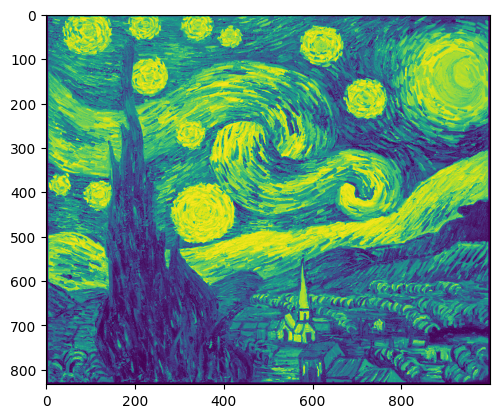

In [35]:
img_eq_copy = img_eq.copy()
cv.rectangle(img_eq_copy, (0, 0), (1000, 833), (0, 255, 0), 7)
plt.imshow(img_eq_copy)
plt.plot()

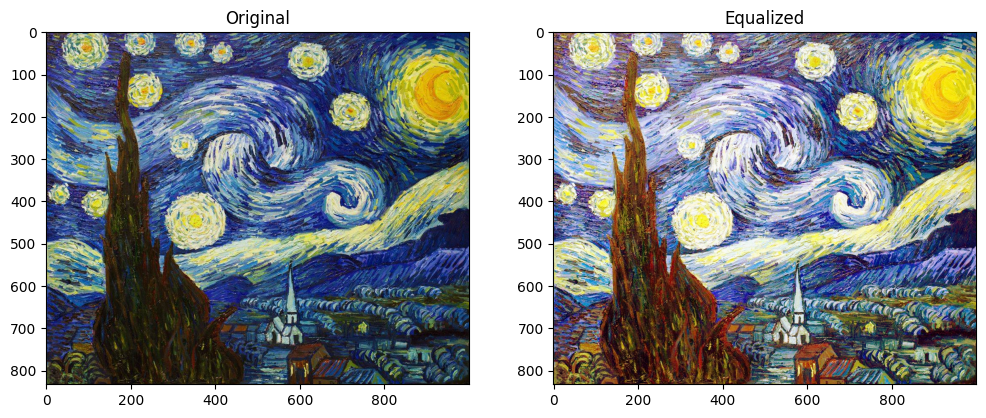

In [56]:
img_eq_rgb = np.zeros(img.shape)
img_eq_rgb[:, :, 0], _ = histeq(img[:, :, 0])
img_eq_rgb[:, :, 1], _ = histeq(img[:, :, 1])
img_eq_rgb[:, :, 2], _ = histeq(img[:, :, 2])
img_eq_rgb = img_eq_rgb.astype('uint8')
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(img)
ax[0].set_title('Original')
ax[1].imshow(img_eq_rgb)
ax[1].set_title('Equalized')
fig.show()

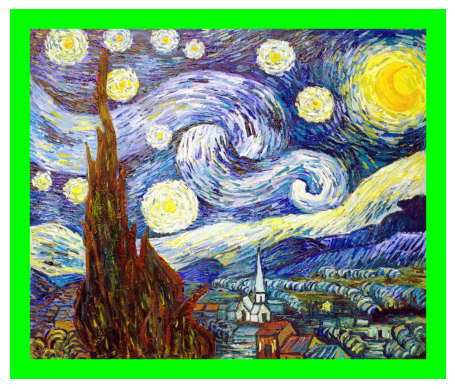

In [61]:
constant = cv.copyMakeBorder(img_eq_rgb, 50, 50 , 50, 50, cv.BORDER_CONSTANT, value=(0, 255, 0))
plt.imshow(constant,'gray')
plt.axis("off")
plt.show()

[]

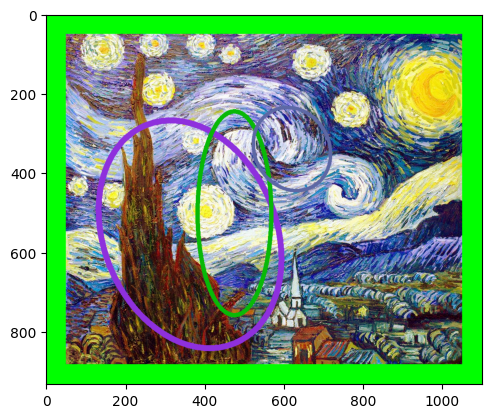

In [77]:
import random
constant_copy = constant.copy()
for _ in range(3):
  center = (random.randint(300, 700), random.randint(250, 650))
  axes = [random.randint(10, 300) for _ in range(2)]
  angle = random.randint(0, 360)
  color = [random.randint(0, 255) for _ in range(3)]
  thick = random.randint(5, 15)
  cv.ellipse(constant_copy, center, axes, angle, 0, 360, color, thick)
plt.imshow(constant_copy)
plt.plot()

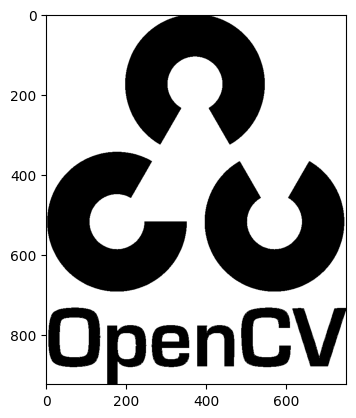

In [99]:
img2 = cv.imread('opencv.png')
rows, cols, channels = img2.shape
img2_gr = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
roi = constant_copy[0:rows, 0:cols]
# Now create a mask of logo and create its inverse mask also
ret, mask = cv.threshold(img2_gr, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

plt.imshow(mask_inv, cmap='gray')

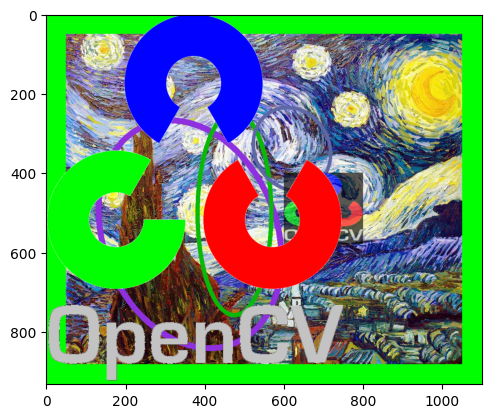

In [100]:
# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)

constant_copy[0:rows, 0:cols ] = dst

plt.imshow(constant_copy)

In [98]:
img2 = cv.imread('opencv.png')
img2 = cv.resize(img2, dsize=(200, 180))

row, col, _ = img2.shape
row_st, col_st = 400, 600
mask = constant_copy[row_st:row+row_st, col_st:col+col_st, :]
dst = cv.addWeighted(mask, 0.6, img2, 0.4, 0)
constant_copy[row_st:row+row_st, col_st:col+col_st, :] = dst
plt.imshow(constant_copy)
plt.show()